# Plot data from Rigol DS1054Z scope

### Import the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import csv

### Import local libraries

In [2]:
from appvib import ClSigFeatures

### Define plot mode. 
Interactive mode is helpful for visuallizing the program execution

In [3]:
#%matplotlib widget

### Define function to read header values

In [4]:
def get_header(str_filename_in):
    """
    
    Pulls in the header information from the scope files
    
    Parameters
    ----------
    str_filename_in : string
        full file name to read
        
    Returns
    -------
    list : header values
    
    """
    
    # Read the CSV headers
    print(str_filename_in)
    file_handle = open(str_filename_in)
    csv_reader = csv.reader(file_handle)
    lst_header = next(csv_reader)
    print(lst_header)
    file_handle.close()

    return lst_header

### Define files to read

A helpful discussion on getting .csv files into Panda:
https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

#### Read in the first data set and visualize the results

In [5]:
help(ClSigFeatures.b_read_data_as_df)

Help on function b_read_data_as_df in module appvib:

b_read_data_as_df(self, str_filename=None)
    Read the entire file in as a pandas dataframe
    
    Parameters
    ----------
    str_filename : string
        Filename, including .csv extension,  to read. If None then filename stored
        in the class is used
    
    Returns
    --------
    lst_data : list
            pandas dataframe : dataframe with all data from the file
            numpy array, datetime : vector with date and timestamps
            numpy array, double : vector with signal sampling rates
            numpy array, double : vector with delta time interval for each signal



In [6]:
str_filename = 'test_003_000.csv'
class_file = ClSigFeatures([1.,2.,3.], 1.)
lst_file = class_file.b_read_data_as_df(str_filename)

Push data into a new class

In [7]:
df1 = lst_file[0]
df1

,X,CH1,CH2
0,0,-0.01,-0.32
1,1,0.04,-0.20
2,2,0.03,-0.12
3,3,-0.02,-0.32
4,4,-0.01,-0.28
...,...,...,...
1195,1195,-0.61,0.96
1196,1196,-0.72,1.04
1197,1197,-0.56,0.92
1198,1198,-0.59,1.00


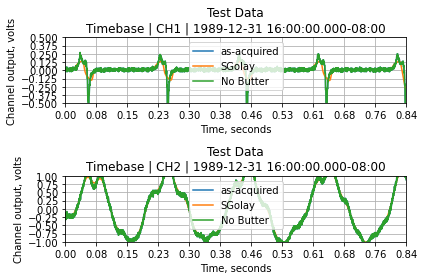

In [8]:
np_d_fs = lst_file[2]
class1 = ClSigFeatures(df1.CH1, np_d_fs[0])
class1.idx_add_sig(df1.CH2, d_fs=np_d_fs[1], str_point_name='CH2')
class1.ylim_tb(ylim_tb_in=[-0.5, 0.5])
class1.ylim_tb(ylim_tb_in=[-1.0, 1.0], idx=1)
lst_plot_sig = class1.plt_sigs()

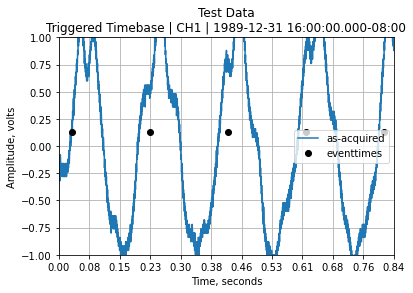

In [9]:
np_d_eventtimes = class1.np_d_est_triggers(np_d_sig=class1.np_d_sig, i_direction=0, d_threshold=0.125)
lst_plt_eventtimes = class1.plt_eventtimes(idx_eventtimes=0, idx=1)

In [10]:
class1.np_d_eventtimes()

array([0.03363025, 0.2277099 , 0.42143607, 0.61643842, 0.81020442])

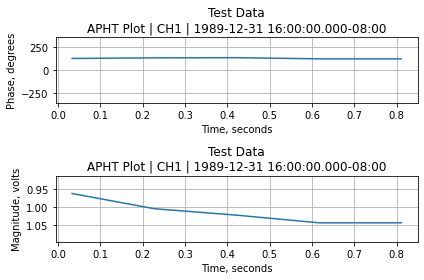

In [11]:
np_d_nx = class1.calc_nx(np_d_sig=class1.get_np_d_sig(idx=1), np_d_eventtimes=class1.np_d_eventtimes(),
                                          b_verbose=False)
lst_apht = class1.plt_apht()